In [1]:
from sklearn.datasets import load_svmlight_file
#this experiment uses a9a of LIBSVM Data, including 32561/16281(testing) samples and each sample has 123/123 (testing) features.
#The data is stored in a9a.txt and a9atest.txt
X_train,Y_train = load_svmlight_file('./datasets/a9a.txt',n_features=123)
X_train = X_train.toarray()
Y_train=Y_train.reshape((-1,1))
for i in range(len(Y_train)):
    Y_train[i][0]=(Y_train[i][0]+1)/2
X_test,Y_test = load_svmlight_file('./datasets/a9atest.txt',n_features=123)
X_test = X_test.toarray()
Y_test=Y_test.reshape((-1,1))
for i in range(len(Y_test)):
    Y_test[i][0]=(Y_test[i][0]+1)/2

I:\softwares\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
import numpy as np
def sigmoid(inX):  #sigmoid函数
    return 1.0/(1+np.exp(-inX))
def predict(w,x,threshold=0.5):
    m,n = np.shape(x)
    y_predict=np.zeros((m,1))
    h=sigmoid(np.dot(x,w))
    for i in range(len(h)):
        if h[i][0]>threshold:
            y_predict[i][0]=1
        else:
            y_predict[i][0]=0
    return y_predict
#使用log loss
def Loss(Y, h):
    m,n=Y.shape
    Jw = (np.dot(Y.T,np.log(h)) + np.dot((1-Y).T,np.log(1-h)))/(-m)
    return Jw[0][0]

m,n = np.shape(X_train)
alpha = 0.01  #设置梯度的阀值，该值越大梯度上升幅度越大
maxCycles = 500 #设置迭代的次数
w = np.ones((n,1)) #设置初始的参数，并都赋默认值为1
threshold=0
batch_size=int(n*0.8)
losses_train=[]
losses_val=[]

In [7]:
for k in range(maxCycles):
    #使用随机梯度下降
    randArr=np.random.randint(0,m,size=batch_size)
    X_train_batch=np.array([X_train[i] for i in randArr])
    Y_train_batch=[Y_train[i] for i in randArr]
    #更新w
    h = sigmoid(np.dot(X_train_batch,w))
    error = (Y_train_batch - h)  #求导后差值
    w = w + alpha * np.dot(X_train_batch.T,error)/batch_size #迭代更新权重
    #计算loss
    h = sigmoid(np.dot(X_train,w))
    losses_train.append(Loss(Y_train,h))
    h = sigmoid(np.dot(X_test,w))
    losses_val.append(Loss(Y_test,h))


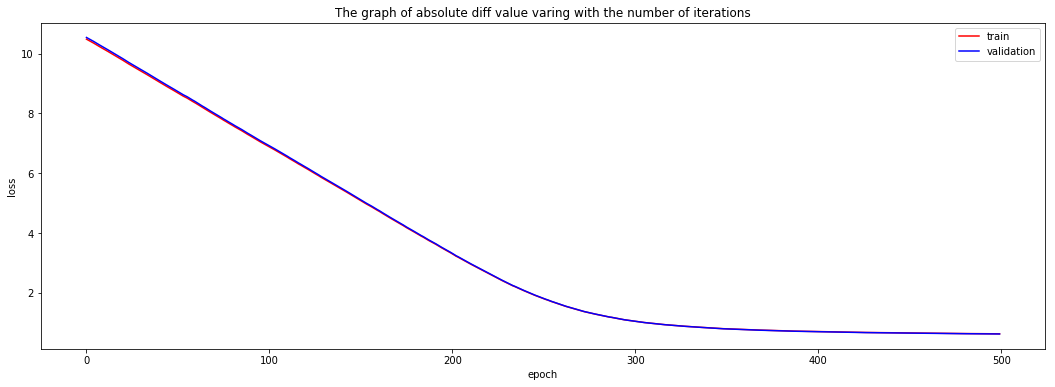

In [8]:
import matplotlib.pyplot as plt
#画出每一次迭代产生的w在测试集和验证集上的loss
plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train")
plt.plot(losses_val, "-", color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of absolute diff value varing with the number of iterations")
plt.savefig('./figures/Logistic.png')
plt.show()